In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import joblib




In [2]:
# Load the IPL data
df = pd.read_csv('ipl_data.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Extract year, month, and day from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [6]:
# Drop the original 'date' column
df = df.drop(['date'], axis=1)

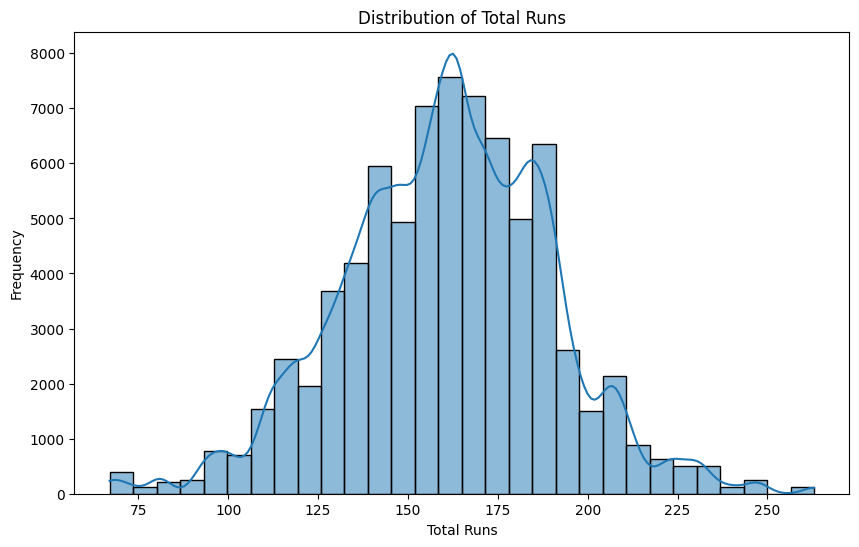

In [7]:
# 1. Distribution of Total Runs
plt.figure(figsize=(10,6))
sns.histplot(df['total'], kde=True, bins=30)
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()


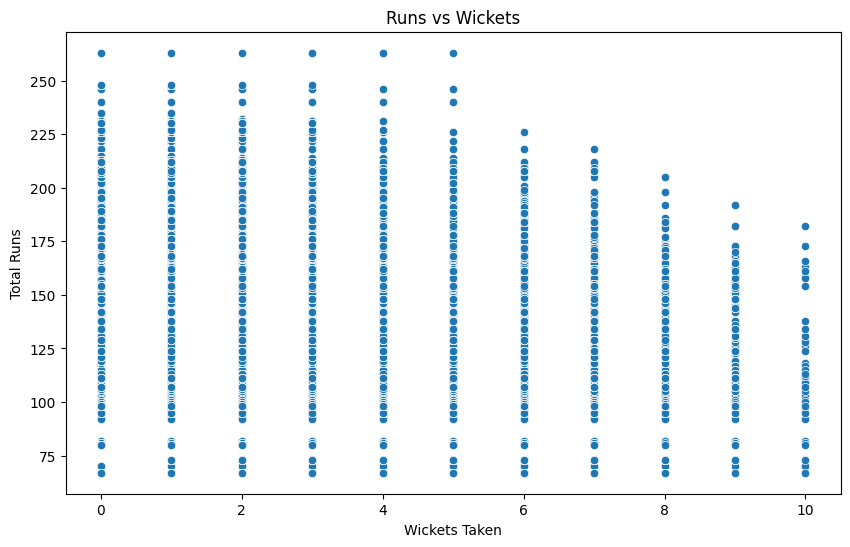

In [8]:
# 2. Runs vs Wickets
plt.figure(figsize=(10,6))
sns.scatterplot(x='wickets', y='total', data=df)
plt.title('Runs vs Wickets')
plt.xlabel('Wickets Taken')
plt.ylabel('Total Runs')
plt.show()

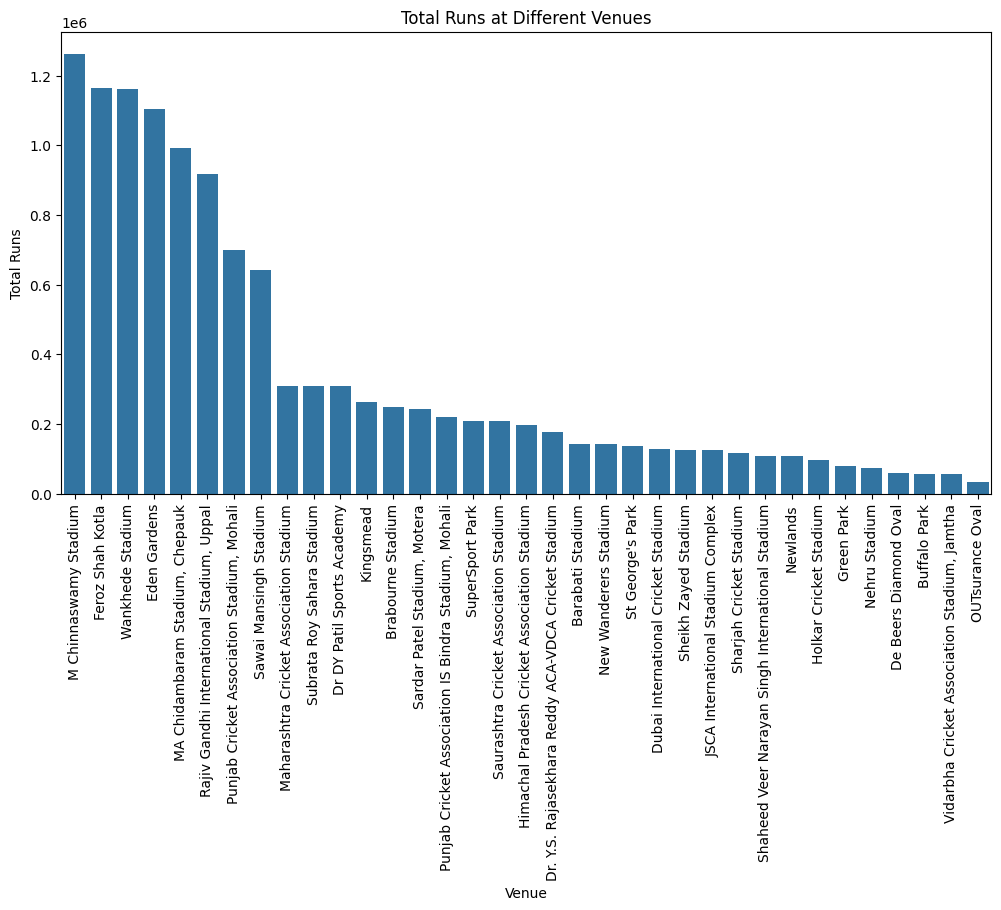

In [9]:
# 3. Venue-wise Total Runs
plt.figure(figsize=(12,6))
venue_runs = df.groupby('venue')['total'].sum().sort_values(ascending=False)
sns.barplot(x=venue_runs.index, y=venue_runs.values)
plt.xticks(rotation=90)
plt.title('Total Runs at Different Venues')
plt.xlabel('Venue')
plt.ylabel('Total Runs')
plt.show()


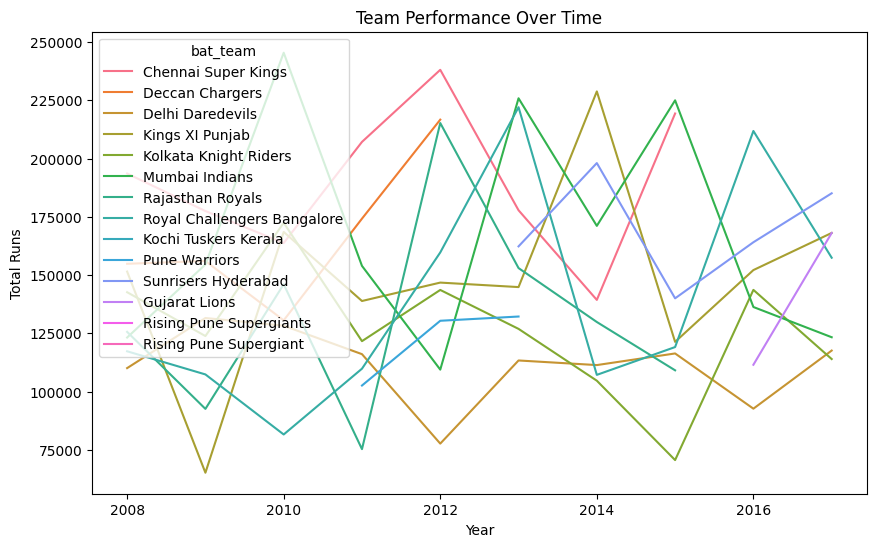

In [10]:
# 4. Performance of Batting Teams Over Time
plt.figure(figsize=(10,6))
team_runs = df.groupby(['year', 'bat_team'])['total'].sum().reset_index()
sns.lineplot(x='year', y='total', hue='bat_team', data=team_runs)
plt.title('Team Performance Over Time')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.show()

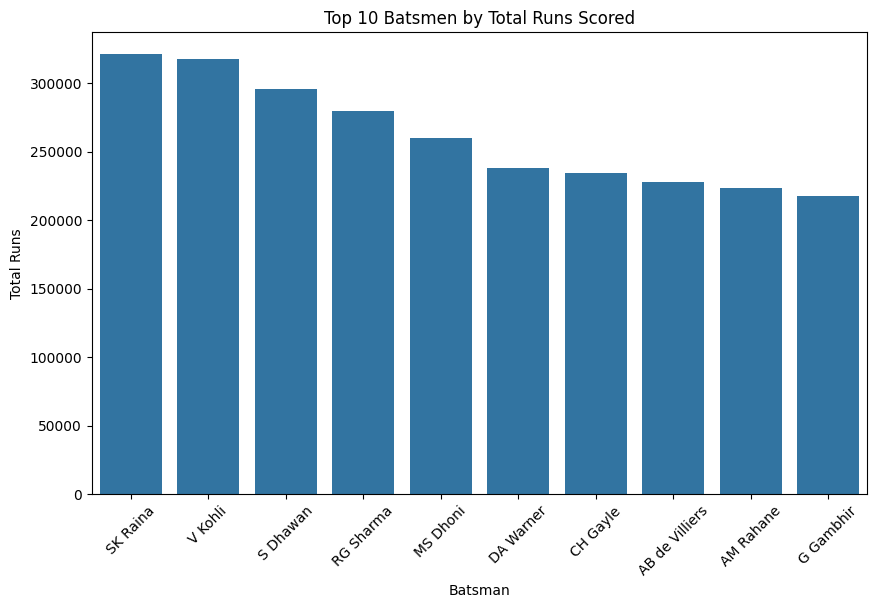

In [11]:
# 5. Top Batsmen by Runs Scored
plt.figure(figsize=(10,6))
top_batsmen = df.groupby('batsman')['total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_batsmen.index, y=top_batsmen.values)
plt.xticks(rotation=45)
plt.title('Top 10 Batsmen by Total Runs Scored')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.show()

In [12]:
# Model Training

# Separate features (X) and target (y)
X = df.drop(columns=['total'])  # Features
y = df['total']  # Target

In [13]:
# Specify the categorical columns
categorical_columns = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']

In [14]:
# Numeric columns
numeric_columns = X.select_dtypes(exclude=['object']).columns.tolist()

In [15]:
# Define a column transformer with OneHotEncoder for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

In [16]:
# Define the pipeline that applies preprocessing and then fits the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['mid', 'runs', 'wickets',
                                                   'overs', 'runs_last_5',
                                                   'wickets_last_5', 'striker',
                                                   'non-striker', 'year',
                                                   'month', 'day']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['venue', 'bat_team',
                                                   'bowl_team', 'batsman',
                                                   'bowler'])])),
                ('regressor', LinearRegression())])

In [19]:
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

In [20]:
# Calculate and print the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [21]:
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 18.291090771195144


In [22]:
# Save the model to a file with ".lb" extension
joblib.dump(model_pipeline, 'ipl_score_predictor.lb')

['ipl_score_predictor.lb']